# Exercise one: Identifying handwritten numbers

### Question 1

Give a list of applications where automatic recognition of hand-written numbers would be useful.

ANSWER:
1. identifying numbers (phones, zip-codes) in questioning for loyalty systems in shops
2. checking the exam's results (for example, Mathematics or Physics at school)
3. digitalize hand-written math equations from notes to computer (for scientists and mathematician could be useful)
4. reconstruction bad-quality images with numbers (depends on needs but could be useful for historical purposes)
5. digitalize doctor's prescription (dosage). But for that better to recognize letters as well :)

In [84]:
#necessary libraries imports
from tensorflow import keras
import matplotlib.pyplot as plt

In [85]:
#divide data on test/train
(x_train, y_train), (x_test, y_test) =keras.datasets.mnist.load_data()

In [86]:
x_train.shape

(60000, 28, 28)

In [87]:
# convert the flatten training and test set images from 28x28 pixels to a column of 784 pixels for each image (row)
x_train = x_train.reshape(60000, 784)
x_train.shape


(60000, 784)

In [88]:
x_test = x_test.reshape(10000, 784)
x_test.shape

(10000, 784)

In [89]:
# Rescale x_train and x_test to values between zero and one
x_train = x_train/255
x_test = x_test/255

In [90]:
#convert the train and testset labels to two new variables
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

Model definition:

In [91]:
model = keras.Sequential()
model.add(keras.layers.Dense(256, input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))

In [92]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 256)               200960    
                                                                 
 dense_21 (Dense)            (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [93]:
model.compile(loss='categorical_crossentropy',
optimizer=keras.optimizers.RMSprop(), metrics='accuracy')

Training and evaluation:


In [94]:
history = model.fit(x_train, y_train, batch_size=128,
epochs=12, verbose=1, validation_split=0.2)

Epoch 1/12
375/375 [==============================] - 4s 7ms/step - loss: 0.4058 - accuracy: 0.8836 - val_loss: 0.2948 - val_accuracy: 0.9170
Epoch 2/12
375/375 [==============================] - 2s 6ms/step - loss: 0.3105 - accuracy: 0.9130 - val_loss: 0.2848 - val_accuracy: 0.9219
Epoch 3/12
375/375 [==============================] - 2s 6ms/step - loss: 0.2956 - accuracy: 0.9160 - val_loss: 0.2882 - val_accuracy: 0.9205
Epoch 4/12
375/375 [==============================] - 2s 6ms/step - loss: 0.2874 - accuracy: 0.9195 - val_loss: 0.2797 - val_accuracy: 0.9234
Epoch 5/12
375/375 [==============================] - 2s 6ms/step - loss: 0.2840 - accuracy: 0.9208 - val_loss: 0.2844 - val_accuracy: 0.9203
Epoch 6/12
375/375 [==============================] - 2s 5ms/step - loss: 0.2798 - accuracy: 0.9218 - val_loss: 0.2876 - val_accuracy: 0.9199
Epoch 7/12
375/375 [==============================] - 2s 6ms/step - loss: 0.2749 - accuracy: 0.9235 - val_loss: 0.2821 - val_accuracy: 0.9235
Epoch 

Plot the training history loss and accuracy for both the training set and validation set.

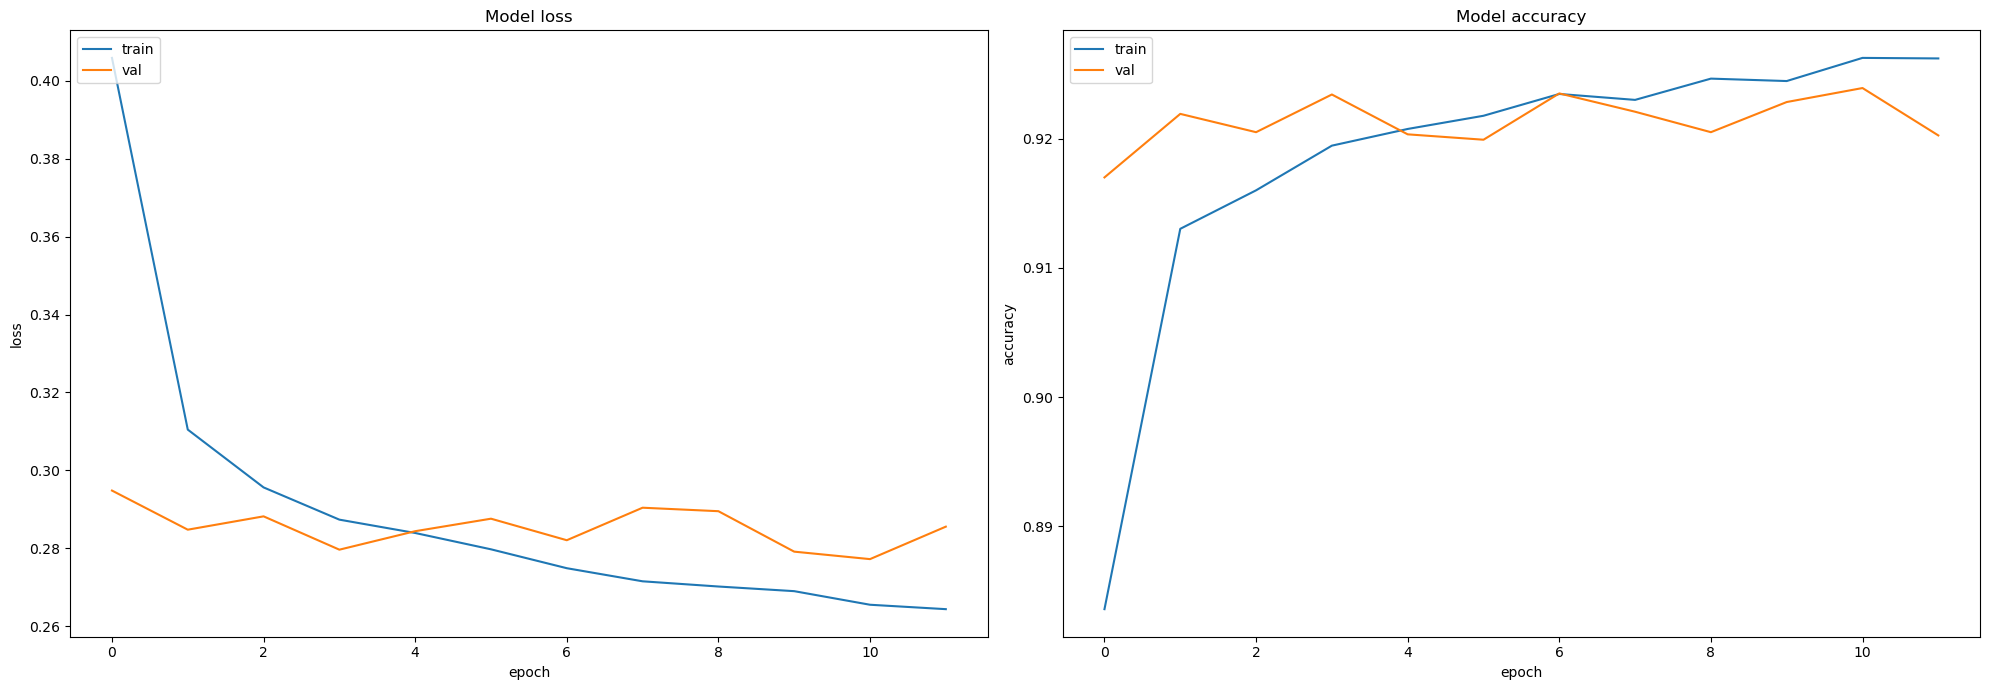

In [95]:
plt.figure(figsize=(20, 7))

plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.tight_layout()
plt.show()

### Question 2

Describe how the accuracy and loss evaluated on the training and validation sets progress differently across epochs, and what this tells us about the generalisation of the model

ANSWER:
It's logically that with the growth of accuracy the loss of the model is decreasing. The most "powerful" are the first 6 epochs in both cases, and after that we can see not so huge changes in it. Also, the train set is tend to get better and better (but it could lead to overfitting) while comparing with validation set, the last is not so stable.

To avoid overfitting we can get the optimal amount of epochs:

In [96]:
#getting optimal amount of epochs
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss",
                                        mode ="min", patience = 5,
                                        restore_best_weights = True)

history_perfect = model.fit(x_train, y_train, batch_size = 128,
                    epochs = 25, validation_split=0.2,
                    callbacks =[earlystopping])


Epoch 1/25
375/375 [==============================] - 2s 6ms/step - loss: 0.2642 - accuracy: 0.9242 - val_loss: 0.2789 - val_accuracy: 0.9255
Epoch 2/25
375/375 [==============================] - 2s 6ms/step - loss: 0.2607 - accuracy: 0.9276 - val_loss: 0.2901 - val_accuracy: 0.9228
Epoch 3/25
375/375 [==============================] - 2s 6ms/step - loss: 0.2614 - accuracy: 0.9269 - val_loss: 0.2778 - val_accuracy: 0.9263
Epoch 4/25
375/375 [==============================] - 3s 7ms/step - loss: 0.2595 - accuracy: 0.9269 - val_loss: 0.2760 - val_accuracy: 0.9262
Epoch 5/25
375/375 [==============================] - 2s 7ms/step - loss: 0.2584 - accuracy: 0.9288 - val_loss: 0.2835 - val_accuracy: 0.9252
Epoch 6/25
375/375 [==============================] - 3s 7ms/step - loss: 0.2574 - accuracy: 0.9282 - val_loss: 0.2742 - val_accuracy: 0.9267
Epoch 7/25
375/375 [==============================] - 2s 5ms/step - loss: 0.2565 - accuracy: 0.9280 - val_loss: 0.2707 - val_accuracy: 0.9276
Epoch 

Therefore, the optimal number of epochs to train most dataset is 12.

In [97]:
#evaluating the perfomance
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

In [98]:
loss

0.28042903542518616

In [99]:
accuracy

0.9258999824523926

### Question 3

Explain whether you think this accuracy is sufficient for some uses of automatic hand-written digit classification, and why.

Overall, 92% is not that bad accuracy. Depending on the consequences of your decision, we can use a different threshold to make the decision. If the action links with some kind of medicine (like one of the example with digitalyzing prescriptions), accuracy should be higher. But for general everyday tasks, it could be enough to use the model.
 For improving the model, we can play around increasing the number of layers and/or neurons, change the activation function or loss function.

### Question 4

 Explain how linear activation of units limits the possible computations this model can perform.


Activation function work well with linear relationships. With classification and computer vision tasks it's better to use more powerful ones to get the higher results to learn the non-linear patterns. Handwritten numbers is a non-linear task. Without that, our MLP model will not learn any non-linear relationship in the data.

In [19]:
# Also, there are other disadvantages of using linear acti:
# - It's not possible to use backpropagation as the derivative of the function is a constant and has no relation to the input x. A
# - All layers of the neural network will collapse into one if a linear activation function is used.
# - The gradients for negative input are zero, which means for activations in that region, the weights are not updated during backpropagation. This can create dead neurons that never get activated
# They allow backpropagation because now the derivative function would be related to the input, and it’s possible to go back and understand which weights in the input neurons can provide a better prediction.
# They allow the stacking of multiple layers of neurons as the output would now be a non-linear combination of input passed through multiple layers. Any output can be represented as a functional computation in a neural network.

# Without the application of an activation function, the only operations in computing the output of a multilayer perceptron would be the linear products between the weights and the input values.

In [103]:
model_2 = keras.Sequential()
model_2.add(keras.layers.Dense(256, input_shape=(784,), activation='relu'))
model_2.add(keras.layers.Dense(10, activation='softmax'))

In [104]:
model_2.compile(loss='categorical_crossentropy',
optimizer=keras.optimizers.RMSprop(), metrics='accuracy')

In [105]:
history_2 = model_2.fit(x_train, y_train, batch_size=128,
epochs=12, verbose=1, validation_split=0.2)

Epoch 1/12
375/375 [==============================] - 3s 6ms/step - loss: 0.3309 - accuracy: 0.9070 - val_loss: 0.1772 - val_accuracy: 0.9503
Epoch 2/12
375/375 [==============================] - 2s 6ms/step - loss: 0.1499 - accuracy: 0.9562 - val_loss: 0.1274 - val_accuracy: 0.9625
Epoch 3/12
375/375 [==============================] - 2s 6ms/step - loss: 0.1027 - accuracy: 0.9704 - val_loss: 0.0991 - val_accuracy: 0.9688
Epoch 4/12
375/375 [==============================] - 2s 6ms/step - loss: 0.0753 - accuracy: 0.9783 - val_loss: 0.0969 - val_accuracy: 0.9712
Epoch 5/12
375/375 [==============================] - 3s 7ms/step - loss: 0.0591 - accuracy: 0.9830 - val_loss: 0.0851 - val_accuracy: 0.9745
Epoch 6/12
375/375 [==============================] - 2s 6ms/step - loss: 0.0471 - accuracy: 0.9868 - val_loss: 0.0800 - val_accuracy: 0.9766
Epoch 7/12
375/375 [==============================] - 2s 5ms/step - loss: 0.0381 - accuracy: 0.9895 - val_loss: 0.0926 - val_accuracy: 0.9744
Epoch 

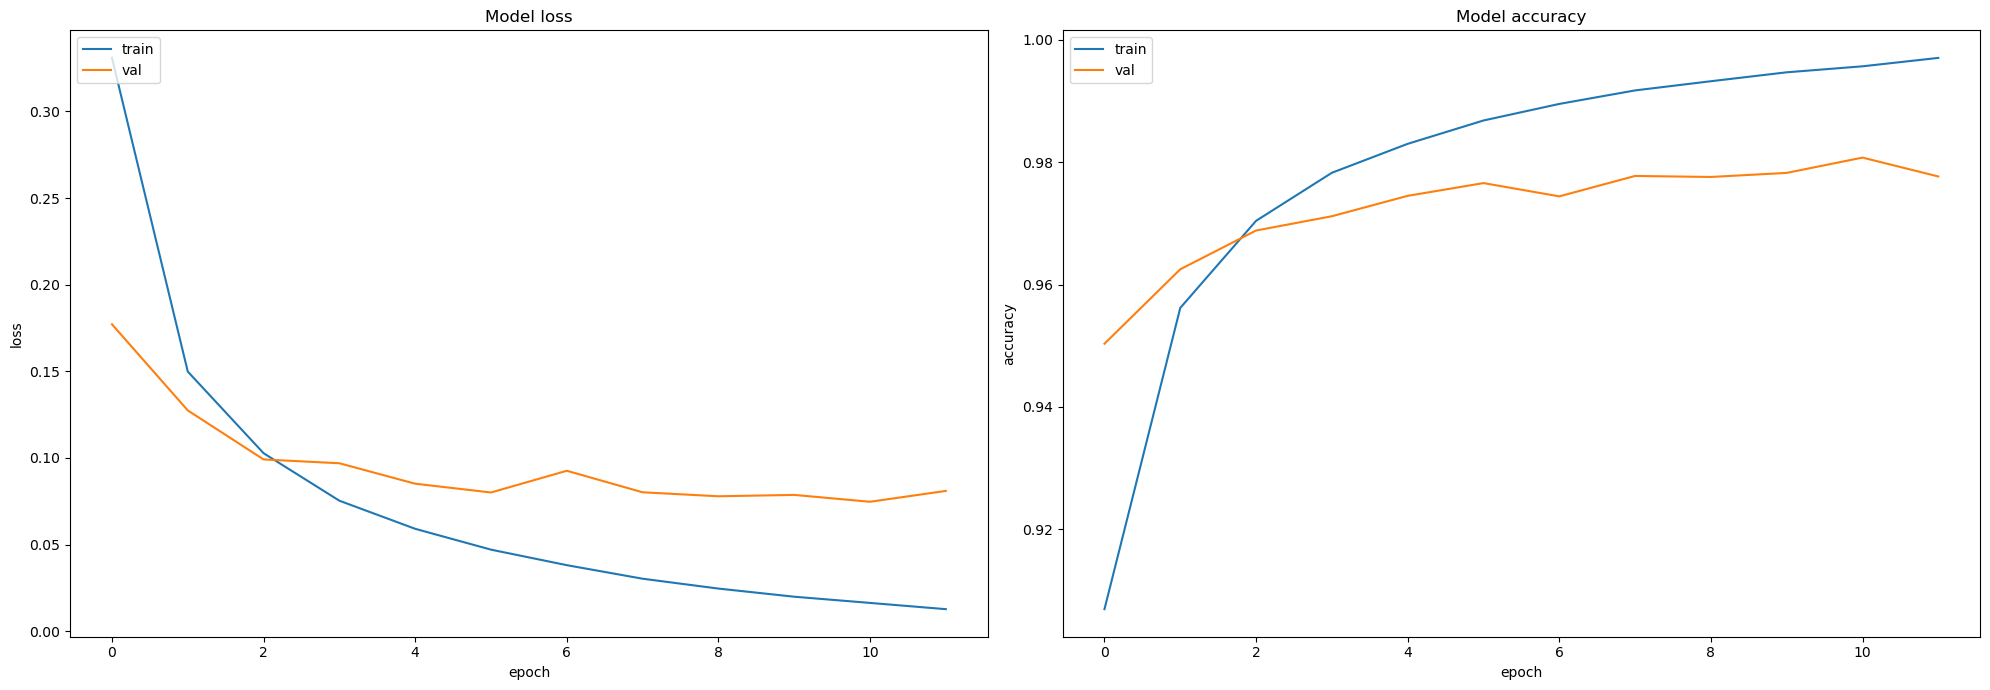

In [106]:
#plots accuracy and loss for the second (non-linear model)

plt.figure(figsize=(20, 7))

plt.subplot(1,2,1)
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.tight_layout()
plt.show()

In [107]:
loss_2, accuracy_2 = model_2.evaluate(x_test, y_test, verbose=0)
loss_2

0.07051040977239609

In [108]:
accuracy_2

0.9797000288963318

In [109]:
#getting optimal amount of epochs for non-linear

history_perfect_2 = model_2.fit(x_train, y_train, batch_size = 128,
                    epochs = 25, validation_split=0.2,
                    callbacks =[earlystopping])

Epoch 1/25
375/375 [==============================] - 2s 6ms/step - loss: 0.0095 - accuracy: 0.9981 - val_loss: 0.0781 - val_accuracy: 0.9793
Epoch 2/25
375/375 [==============================] - 2s 6ms/step - loss: 0.0078 - accuracy: 0.9984 - val_loss: 0.0835 - val_accuracy: 0.9780
Epoch 3/25
375/375 [==============================] - 2s 6ms/step - loss: 0.0061 - accuracy: 0.9987 - val_loss: 0.0813 - val_accuracy: 0.9807
Epoch 4/25
375/375 [==============================] - 2s 6ms/step - loss: 0.0049 - accuracy: 0.9993 - val_loss: 0.0871 - val_accuracy: 0.9795
Epoch 5/25
375/375 [==============================] - 2s 6ms/step - loss: 0.0039 - accuracy: 0.9994 - val_loss: 0.0874 - val_accuracy: 0.9794
Epoch 6/25
375/375 [==============================] - 2s 6ms/step - loss: 0.0027 - accuracy: 0.9997 - val_loss: 0.0857 - val_accuracy: 0.9808


Therefore, we have 6.

### Question 5

Describe how this training history differs from the previous model, for the training and validation sets. Explain what this tells us about the generalisation of the model.

ANSWER:
The lines became smoother, and we see how stable is the line in validation set. Also, we see the improvement in accuracy and loss' decreasing comparing with linear model. Each epoch is better than previous one while in linear it was non-stable. Relu seems more efficient as it only requires a simple threshold operation to compute the activation. ALso, comparing the computing time relu is a little faster, but it's also because of the simple structure.

### Deep convolutional networks

Prepare our data differently.

In [110]:
(x_train, y_train), (x_test, y_test) =keras.datasets.mnist.load_data()
#add extra dimension for colour channel
x_train = x_train.reshape(60000, 28,28,1)
x_train.shape

(60000, 28, 28, 1)

In [111]:
x_test = x_test.reshape(10000, 28,28,1)
x_test.shape

(10000, 28, 28, 1)

In [112]:
# Rescale x_train and x_test to values between zero and one
x_train = x_train/255
x_test = x_test/255

In [113]:
#convert the train and testset labels to two new variables
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

Now we will define a convolutional learning model with 2 convolutional layers that result from 32 convolutional filters into the first layer and 64 filters into the second. We will use 3x3 pixel filters to sample from the image to the first layer, and the same to sample from the first layer to the second. We will use rectified activation functions for both convolutional layers. We will use pooling to downsample the second convolutional layer to half its size in both spatial dimensions (so one quarter of the pixels). We will flatten the resulting feature map to one dimension, then use one fully- connected layer to link our network to the labels.

In [31]:
#define a convolutional learning model with 2 convolutional layers
model_3 = keras.Sequential()
model_3.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)))
model_3.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
model_3.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model_3.add(keras.layers.Flatten())
model_3.add(keras.layers.Dense(128, activation="relu"))
model_3.add(keras.layers.Dense(10, activation="softmax"))
model_3.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.Adadelta(learning_rate=1), metrics='accuracy')

In [32]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               1179776   
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                      

In [33]:
history_3 = model_3.fit(x_train, y_train, batch_size=128,
epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
375/375 [==============================] - 37s 97ms/step - loss: 0.2359 - accuracy: 0.9265 - val_loss: 0.0594 - val_accuracy: 0.9832
Epoch 2/6
375/375 [==============================] - 40s 108ms/step - loss: 0.0531 - accuracy: 0.9836 - val_loss: 0.0572 - val_accuracy: 0.9833
Epoch 3/6
375/375 [==============================] - 56s 149ms/step - loss: 0.0326 - accuracy: 0.9901 - val_loss: 0.0430 - val_accuracy: 0.9873
Epoch 4/6
375/375 [==============================] - 53s 142ms/step - loss: 0.0209 - accuracy: 0.9931 - val_loss: 0.0442 - val_accuracy: 0.9877
Epoch 5/6
375/375 [==============================] - 50s 133ms/step - loss: 0.0145 - accuracy: 0.9956 - val_loss: 0.0433 - val_accuracy: 0.9880
Epoch 6/6
375/375 [==============================] - 52s 139ms/step - loss: 0.0099 - accuracy: 0.9971 - val_loss: 0.0465 - val_accuracy: 0.9886


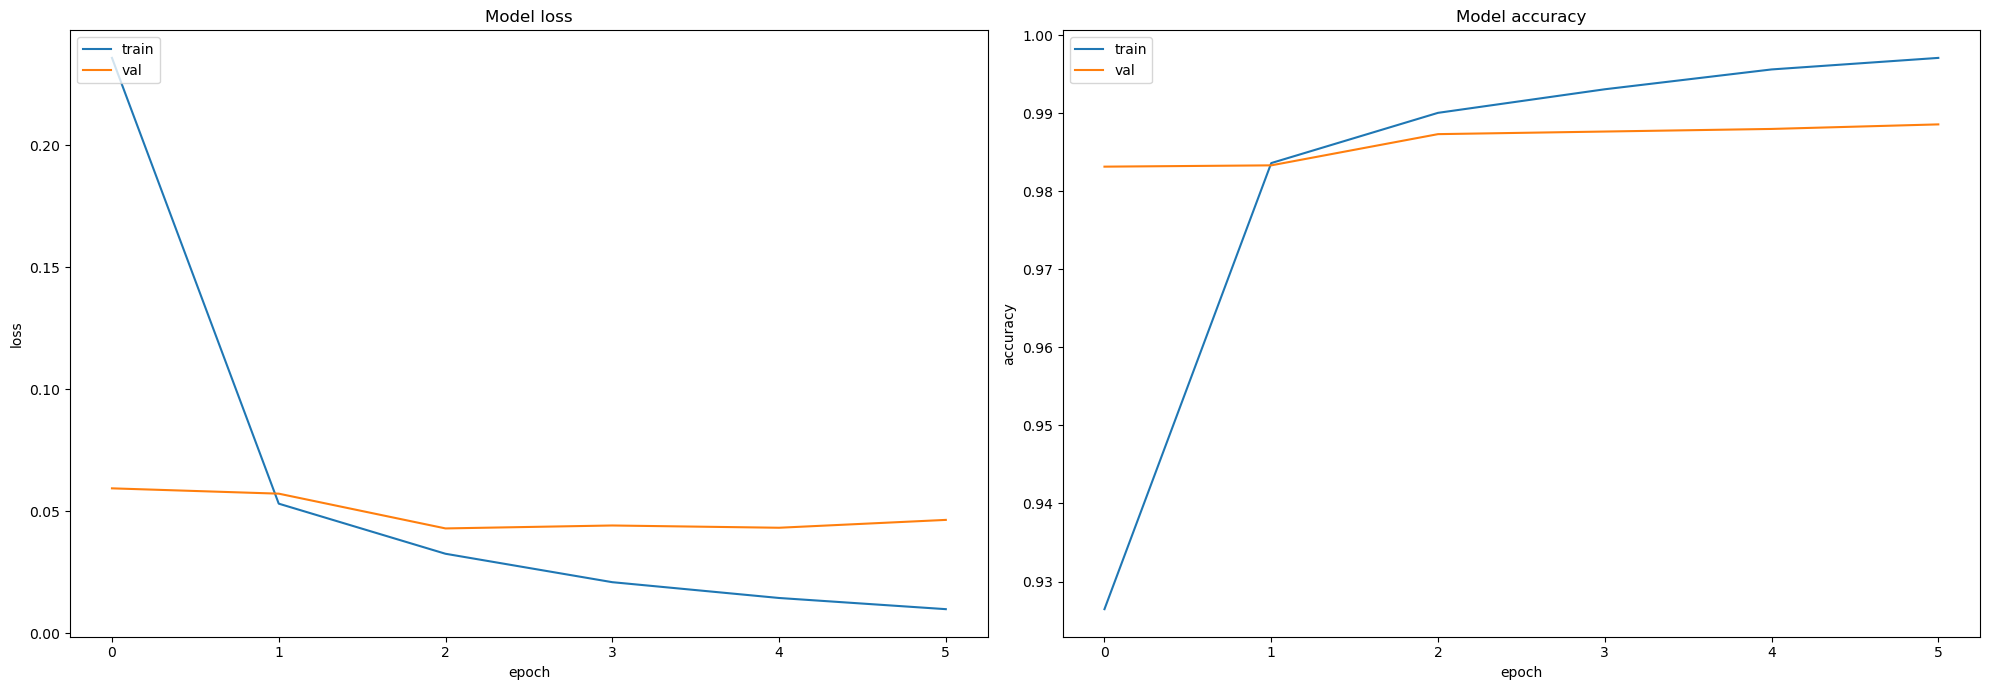

In [34]:
#plots with with 2 convolutional layers

plt.figure(figsize=(20, 7))

plt.subplot(1,2,1)
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.tight_layout()
plt.show()

In [35]:
loss_3, accuracy_3 = model_3.evaluate(x_test, y_test, verbose=0)
loss_3

0.03598647564649582

In [36]:
accuracy_3

0.9887999892234802

### Question 6

Explain whether you think this is sufficient for the uses of automatic hand-written digit classification you listed in Question 1, and why

ANSWER:

Overall, then higher result of prediction, then better. In our case, the time of running is ok, capacity of CPU can deal with calculations. So, why not to have the good accuracy?
Of course, when we talk about limits, in real life we have more complex and huge datasets, and easier models could be more efficient (on business purposes, it's cheaper and faster). But when we talk about health care (like one of our example - 5, medicine) and similar fields where the price of errors is really high (military and emergency services, child care, etc) we demand the accuracy to be as high as possible. Also, we need to pay attention to the idea of overfitting: in a train set is tend to be close to 1 but on test is not that high.
Also, we need to keep in my mind the overfitting concept. So, when we have a high result in train could not mean that we will get high result with test.


### Question 7

Dropout’ is a method used in deep network training to prevent overfitting of training data and focus on aspects of the learning model that will generalise to new data. Research and describe the principles of overfitting and how dropout can reduce this

ANSWER:
Overall, overfitting is when a model is trained too well on the training data but relly bad on performing (low bias, high variance)
Principles of overfitting:
- too complex model for the data (in neural network - a lot of layers/number of neurons),
- no/law regularization (more about that below with the dropout explanation),
- lack of training data (the model tend to overfit when the dataset is small),
- using too many epochs and adding a lot of features (the model catch all patterns and noise).

Dropout method is literally refers to dropping out the nodes (input and hidden layer).
It forces the layers to take more or less responsibility for the input by taking a probabilistic approach. Lossing the part of 'information' from the learning process helps to learn the average that leads to 'perfect' (non-overfitted) model. So, we can solve the problem getting the model less complex, more general and not learning the noise.

In [118]:
# adding dropout layer

model_4 = keras.Sequential()
model_4.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)))
model_4.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
model_4.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model_4.add(keras.layers.Dropout(rate=0.25))

model_4.add(keras.layers.Flatten())
model_4.add(keras.layers.Dense(128, activation="relu"))
model_4.add(keras.layers.Dropout(rate=0.5))
model_4.add(keras.layers.Dense(10, activation="softmax"))
model_4.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.Adadelta(learning_rate=1), metrics='accuracy')


In [119]:
model_4.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_21 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 12, 12, 64)       0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 12, 12, 64)        0         
                                                                 
 flatten_10 (Flatten)        (None, 9216)              0         
                                                                 
 dense_28 (Dense)            (None, 128)               1179776   
                                                     

In [120]:
history_4 = model_4.fit(x_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
375/375 [==============================] - 57s 149ms/step - loss: 0.3294 - accuracy: 0.8989 - val_loss: 0.0687 - val_accuracy: 0.9796
Epoch 2/6
375/375 [==============================] - 62s 164ms/step - loss: 0.1024 - accuracy: 0.9700 - val_loss: 0.0532 - val_accuracy: 0.9836
Epoch 3/6
375/375 [==============================] - 61s 163ms/step - loss: 0.0744 - accuracy: 0.9785 - val_loss: 0.0425 - val_accuracy: 0.9876
Epoch 4/6
375/375 [==============================] - 60s 161ms/step - loss: 0.0613 - accuracy: 0.9814 - val_loss: 0.0414 - val_accuracy: 0.9880
Epoch 5/6
375/375 [==============================] - 63s 167ms/step - loss: 0.0507 - accuracy: 0.9842 - val_loss: 0.0406 - val_accuracy: 0.9882
Epoch 6/6
375/375 [==============================] - 62s 165ms/step - loss: 0.0450 - accuracy: 0.9857 - val_loss: 0.0398 - val_accuracy: 0.9887


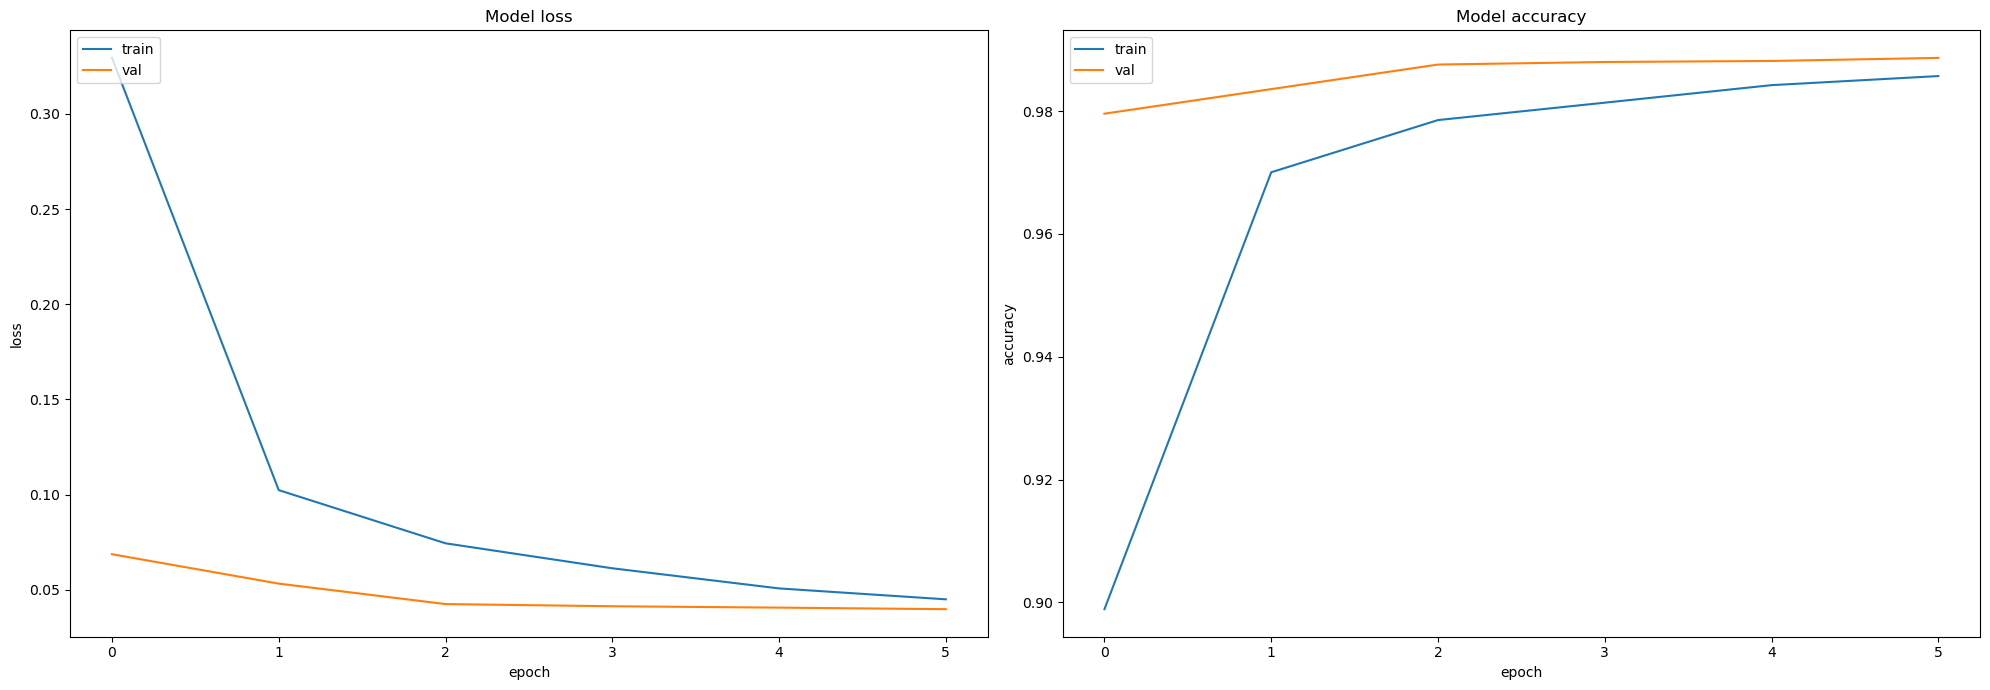

In [121]:
#plots with 2 convolutional layers

plt.figure(figsize=(20, 7))

plt.subplot(1,2,1)
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.tight_layout()
plt.show()

In [122]:
loss_4, accuracy_4 = model_4.evaluate(x_test, y_test, verbose=0)
loss_4

0.031219936907291412

In [123]:
accuracy_4

0.989799976348877

### Question 8

In comparison to the previous (convolutional) model:
a) How does the time taken for each training epoch differ? (Google Colab may not show this clearly, in which case run this on your own hardware)

ANSWER:
Without dropout layers: 288
With dropout: 365
There is a difference when we add dropouts: +25% to runtime. But it has some advantages to avoid overfitting, and in our case we have not so huge dataset and have some advantages in performing which are discussed below.

b) How does the training history differ for both the training and validation sets?
We can see comparing with the general convolutional model that lines switched sides: now the test dataset is performing better which means we deal with overfitting and at the test we get higher result and fewer loss. Also, we can notice that with increasing the amount of epochs the distance between test and train is getting smaller when without dropouts it's getting wider which is a bad sign (sign of overfitting)

c) How well does the resulting model generalise?
In general, it's more important to get higher accuracy in test data so the resulting model with dropout layers is better. So, in that case we can be sure, if we change the test set it will be have higher probability to predict with the same high accuracy as now.

# Exercise two: Identifying objects from images

In [127]:
#fowload the dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [128]:
#preprocess the data:

# dividing their values by 255, storing the result in variables x_train and x_test
x_train = x_train/255
x_test = x_test/255

# Convert the training and test labels to categorical variables, as before with the handwritten digits, storing the result in variables y_train and y_test.
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [129]:
# Define the model using the convolutional network with dropout  as a template.

model_5 = keras.Sequential()
model_5.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(32, 32, 3), padding = 'same'))
model_5.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu"))
model_5.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model_5.add(keras.layers.Dropout(rate=0.25))

model_5.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", padding = 'same'))
model_5.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu"))
model_5.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model_5.add(keras.layers.Dropout(rate=0.25))

model_5.add(keras.layers.Flatten())

model_5.add(keras.layers.Dense(512, activation="relu"))
model_5.add(keras.layers.Dropout(rate=0.5))
model_5.add(keras.layers.Dense(10, activation="softmax"))

model_5.compile(loss='categorical_crossentropy',optimizer = keras.optimizers.RMSprop(learning_rate=0.0001, weight_decay=1e-6), metrics='accuracy')
# specialised optimizer module

In [130]:
model_5.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_27 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 dropout_23 (Dropout)        (None, 15, 15, 32)        0         
                                                                 
 conv2d_28 (Conv2D)          (None, 15, 15, 32)        9248      
                                                                 
 conv2d_29 (Conv2D)          (None, 13, 13, 32)        9248      
                                                     

In [131]:
history_5 = model_5.fit(x_train, y_train, batch_size=32,
epochs=20, verbose=1, validation_data=(x_test, y_test),shuffle = True) #to run through the images in a different order of batches each epoch.

Epoch 1/20
1563/1563 [==============================] - 146s 92ms/step - loss: 1.9596 - accuracy: 0.2784 - val_loss: 1.6901 - val_accuracy: 0.3879
Epoch 2/20
1563/1563 [==============================] - 150s 96ms/step - loss: 1.6456 - accuracy: 0.3980 - val_loss: 1.4968 - val_accuracy: 0.4585
Epoch 3/20
1563/1563 [==============================] - 146s 94ms/step - loss: 1.5077 - accuracy: 0.4526 - val_loss: 1.3993 - val_accuracy: 0.4917
Epoch 4/20
1563/1563 [==============================] - 148s 95ms/step - loss: 1.4140 - accuracy: 0.4885 - val_loss: 1.3664 - val_accuracy: 0.5137
Epoch 5/20
1563/1563 [==============================] - 127s 81ms/step - loss: 1.3399 - accuracy: 0.5189 - val_loss: 1.2944 - val_accuracy: 0.5424
Epoch 6/20
1563/1563 [==============================] - 130s 83ms/step - loss: 1.2768 - accuracy: 0.5466 - val_loss: 1.1809 - val_accuracy: 0.5792
Epoch 7/20
1563/1563 [==============================] - 130s 83ms/step - loss: 1.2189 - accuracy: 0.5694 - val_loss: 1

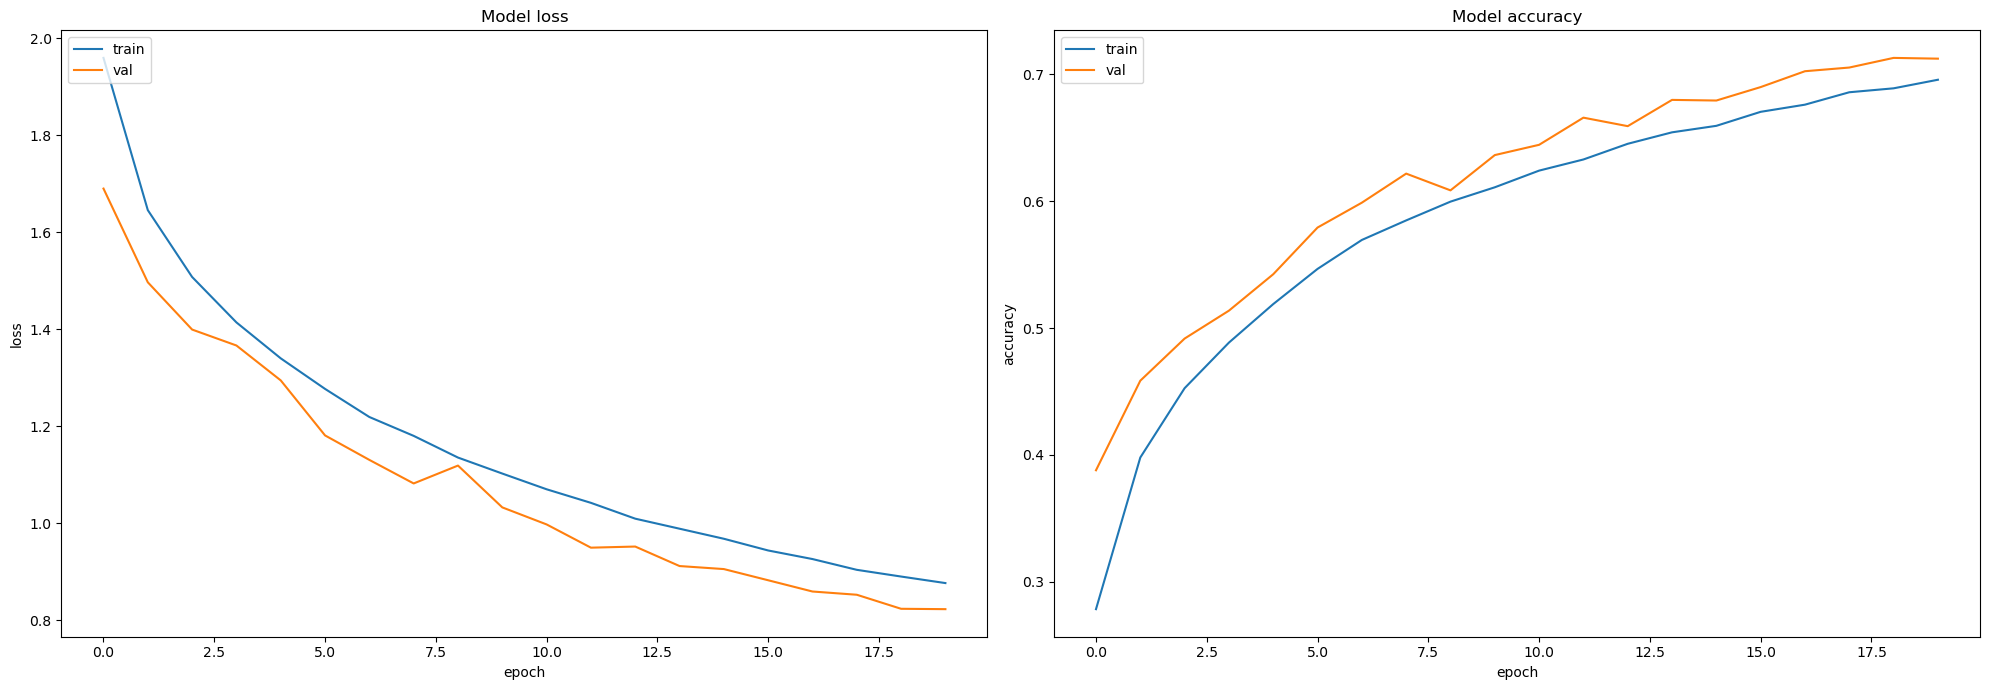

In [132]:
#plot the training history
plt.figure(figsize=(20, 7))

plt.subplot(1,2,1)
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_5.history['accuracy'])
plt.plot(history_5.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
# (Question 9, 13 points total)
# In comparison to the convolutional model for digit recognition:
# a) How long does it take to run each training epoch? (This should be clear, even
# in Google Colab)(1 point)
# b) Give at least factors that may contribute to this difference, explaining each. (4
# points)
# c) Describehowthetraininghistorydiffersandwhy.(6points)
# d) Thesimpler,non-convolutionalmodelsfromExercise1(Questions2-5)would
# perform very poorly on this object recognition task, while they do fairly well on number recognition. What differences between these tasks could underlie this difference in performance? (2 points))